Перші 5 записів датасету:
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

Розмір навчальної вибірки: 104 зразків
Розмір тестової вибірки: 45 зразків


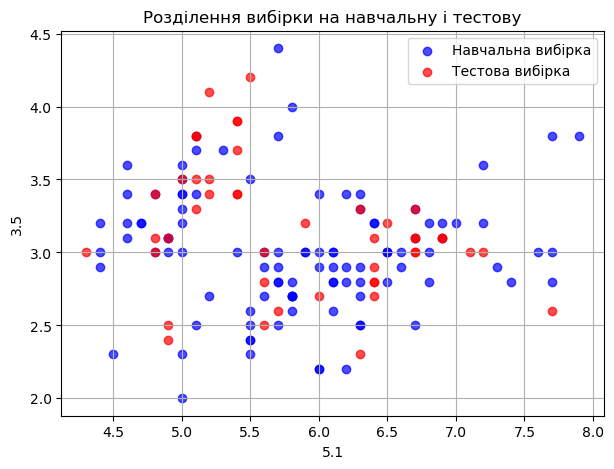

K=1: точність = 0.911
K=2: точність = 0.911
K=3: точність = 0.911
K=4: точність = 0.911
K=5: точність = 0.911
K=6: точність = 0.956
K=7: точність = 0.956
K=8: точність = 0.956
K=9: точність = 0.933
K=10: точність = 0.956
K=11: точність = 0.933
K=12: точність = 0.933
K=13: точність = 0.933
K=14: точність = 0.933
K=15: точність = 0.911
K=16: точність = 0.933
K=17: точність = 0.911
K=18: точність = 0.933
K=19: точність = 0.911
K=20: точність = 0.911


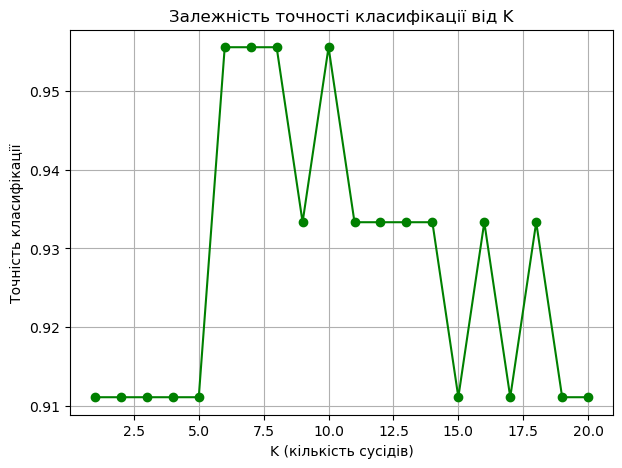


Найкращі результати:
Максимальна точність = 0.956
Однакова точність спостерігається для K = [6, 7, 8, 10]
Для подальшої роботи обираємо K = 6 (найменше з них).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv("IrisData_full.csv")

print("Перші 5 записів датасету:")
print(data.head())

X = data.iloc[:, :-1]   
y = data.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

print(f"\nРозмір навчальної вибірки: {len(X_train)} зразків")
print(f"Розмір тестової вибірки: {len(X_test)} зразків")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(7,5))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', label='Навчальна вибірка', alpha=0.7)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], color='red', label='Тестова вибірка', alpha=0.7)
plt.title('Розділення вибірки на навчальну і тестову')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.grid(True)
plt.show()

accuracies = {}
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"K={k}: точність = {acc:.3f}")

plt.figure(figsize=(7,5))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o', color='green')
plt.title('Залежність точності класифікації від K')
plt.xlabel('K (кількість сусідів)')
plt.ylabel('Точність класифікації')
plt.grid(True)
plt.show()

max_acc = max(accuracies.values())
best_ks = [k for k, v in accuracies.items() if v == max_acc]
best_k = min(best_ks)

print("\nНайкращі результати:")
print(f"Максимальна точність = {max_acc:.3f}")
print(f"Однакова точність спостерігається для K = {best_ks}")
print(f"Для подальшої роботи обираємо K = {best_k} (найменше з них).")